
@article {rtsd,
    title = {Russian traffic sign images dataset},
    journal = {Computer Optics},
    volume = {40},
    number = {2},
    year = {2016},
    pages = {294-300},
    issn = {0134-2452},
    doi = {10.18287/2412-6179-2016-40-2-294-300},
    author = {Vladislav Shakhuro and Anton Konushin}
}


# Libraries

In [1]:
import numpy as np

import cv2

import tensorflow as tf
from tensorflow.contrib.layers import flatten

import warnings

import os
from os import listdir
from os.path import isfile, join

from PIL import Image
import requests
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import random

import matplotlib.pyplot as plt
from util_functions import *

%matplotlib inline

C:\Users\andrey_kofnov\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\andrey_kofnov\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\andrey_kofnov\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\andrey_kofnov\anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)



# Loading data

In [3]:
# Training and testing data are saved on this files

new_data_folder = "rtsd-r3\\rtsd-r3\\"
train_path = new_data_folder + "train\\"
image_name_list = [f for f in listdir(train_path)]

image_list = []
for fi in os.listdir(train_path):
    image_list.append(cv2.resize(np.array(Image.open(train_path + fi)), (32,32)))
    
X_train = np.array(image_list)
    
    
test_path = new_data_folder + "test\\"
image_name_list = [f for f in listdir(test_path)]
image_list = []
for fi in os.listdir(test_path):
    image_list.append(cv2.resize(np.array(Image.open(test_path + fi)), (32,32)))
    
X_test = np.array(image_list)


train_info = pd.read_csv(new_data_folder + 'gt_train.csv')
y_train = np.array(train_info['class_number'])


test_info = pd.read_csv(new_data_folder + 'gt_test.csv')
y_test = np.array(test_info['class_number'])

In [4]:
# LOOKING AT NUMBERS OF OBSERVATIONS


train_count = X_train.shape[0]

print('------------------------------------')
print("Number of training examples =", train_count)


test_count = X_test.shape[0]

print('------------------------------------')
print("Number of testing examples =", test_count)


im_shape = X_train[0].shape

print('------------------------------------')
print("Image shape =", im_shape)


n_train_classes = np.unique(y_train).shape[0]
print('------------------------------------')
print("Number of train classes =", n_train_classes)


n_classes = train_test_union(y_train, y_test).shape[0]
print('------------------------------------')
print("Number of classes =", n_classes)

print('------------------------------------')

------------------------------------
Number of training examples = 70687
------------------------------------
Number of testing examples = 22967
------------------------------------
Image shape = (32, 32, 3)
------------------------------------
Number of train classes = 105
------------------------------------
Number of classes = 106
------------------------------------


Train observation #: 68556  |  class label: 67
Train observation #: 66769  |  class label: 31
Train observation #: 11650  |  class label: 38
Train observation #: 65077  |  class label: 12


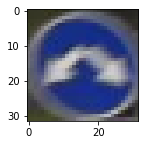

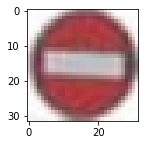

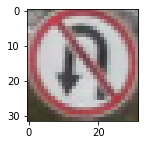

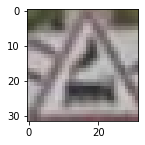

In [5]:
# Visualizations of 4 images

for z in range(4):
    index = random.randint(0, train_count)
    image = X_train[index]

    plt.figure(figsize=(2,3))
    plt.imshow(image)
    print("Train observation #: {}  |  class label: {}".format(index, y_train[index]))

Trafic Signs Train summary statistics:
count      105.0
mean       673.0
std       2159.0
min          8.0
50%        139.0
max      19913.0
Name: Trafic Signs Train, dtype: float64


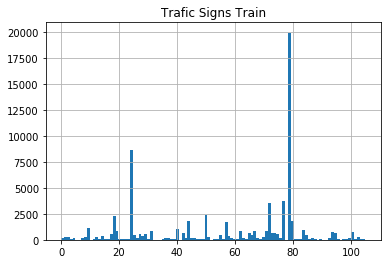

In [6]:
summary_statistics(y_train, 'Trafic Signs Train', n_classes)

Trafic Signs Test summary statistics:
count      97.0
mean      237.0
std       537.0
min         3.0
50%        63.0
max      4196.0
Name: Trafic Signs Test, dtype: float64


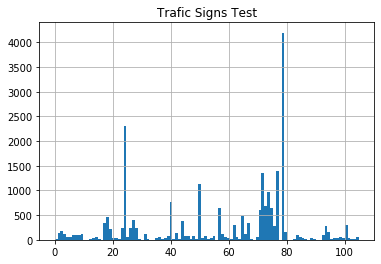

In [7]:
summary_statistics(y_test, 'Trafic Signs Test', n_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


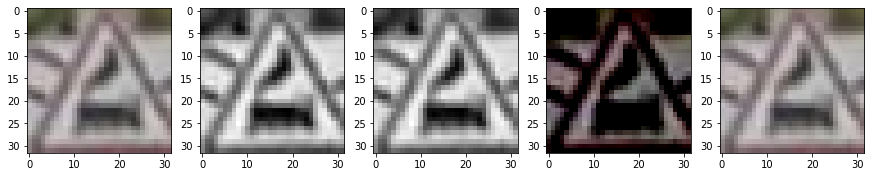

In [8]:
#Pre-process the Data Set (normalization, grayscale, etc.)

example1 = image.squeeze()
example2 = preProc_t2(preProc_t1(image)).squeeze()
example3 = preProc_t3(preProc_t1(image)).squeeze()
example4 = preProc_t2(image).squeeze()
example5 = preProc_t3(image).squeeze()

# Five subplots sharing both x/y axes

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,3))
ax1.imshow(example1)
ax2.imshow(example2, cmap='gray')
ax3.imshow(example3, cmap='gray')
ax4.imshow(example4)
ax5.imshow(example5)

(32, 32)

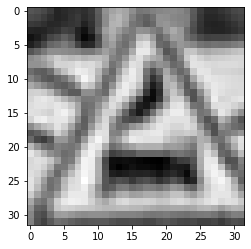

In [9]:
# Apply preprocessin on all features
X_train_p = np.array([preProc_t3(preProc_t1(x)).reshape((32,32,1)) for x in X_train])
X_test_p  = np.array([preProc_t3(preProc_t1(x)).reshape((32,32,1)) for x in X_test])


example = X_train_p[index].squeeze()
plt.imshow(example, cmap='gray')
example.shape

In [10]:
print('------------------------------------')
list_Diff(list(y_test), list(y_train))
print('Classes in test sample and not in train sample: ', list_Diff(list(y_test), list(y_train)))

print('------------------------------------')
list_Diff(list(y_test), list(y_train))
print('Classes in train sample and not in test sample: ', list_Diff(list(y_train), list(y_test)))

print('------------------------------------')

------------------------------------
Classes in test sample and not in train sample:  [89]
------------------------------------
Classes in train sample and not in test sample:  [33, 69, 91, 11, 78, 82, 56, 88, 30]
------------------------------------


In [11]:
#One hot encoding

y_train_o = y_train.reshape((y_train.shape[0],1))
y_test_o  = y_test.reshape((y_test.shape[0],1))

one = OneHotEncoder()

one.fit(train_test_union_v2(y_train_o, y_test_o))

y_train_o = one.transform(y_train_o).toarray()
y_test_o  = one.transform(y_test_o).toarray()


# Shuffle training data

X_train_p, y_train_o = shuffle(X_train_p, y_train_o)

In [12]:
#Train, Validate and Test the Model

In [13]:
ITERATIONS = 35
BATCH_S = 128
### Train the model.


x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None,n_classes))
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [14]:
# A training pipeline 
rate = 0.001

logits = neuNet(x, keep_prob, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start training...")
    print()
    for i in range(ITERATIONS):
        X_train_p, y_train_o = shuffle(X_train_p, y_train_o)
        for offset in range(0, num_examples, BATCH_S):
            end = offset + BATCH_S
            batch_x, batch_y = X_train_p[offset:end], y_train_o[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_test_p, y_test_o, BATCH_S, accuracy_operation, x, y, keep_prob)
        print("Iteration {} ...".format(i+1))
        print("Valid Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model is done!")

Start training...


Iteration 1 ...
Valid Accuracy = 0.800

Iteration 2 ...
Valid Accuracy = 0.857

Iteration 3 ...
Valid Accuracy = 0.876

Iteration 4 ...
Valid Accuracy = 0.886

Iteration 5 ...
Valid Accuracy = 0.902

Iteration 6 ...
Valid Accuracy = 0.906

Iteration 7 ...
Valid Accuracy = 0.908

Iteration 8 ...
Valid Accuracy = 0.919

Iteration 9 ...
Valid Accuracy = 0.920

Iteration 10 ...
Valid Accuracy = 0.920

Iteration 11 ...
Valid Accuracy = 0.926

Iteration 12 ...
Valid Accuracy = 0.924

Iteration 13 ...
Valid Accuracy = 0.932

Iteration 14 ...
Valid Accuracy = 0.929

Iteration 15 ...
Valid Accuracy = 0.928

Iteration 16 ...
Valid Accuracy = 0.931

Iteration 17 ...
Valid Accuracy = 0.927

Iteration 18 ...
Valid Accuracy = 0.930

Iteration 19 ...
Valid Accuracy = 0.931

Iteration 20 ...
Valid Accuracy = 0.933

Iteration 21 ...
Valid Accuracy = 0.935

Iteration 22 ...
Valid Accuracy = 0.934

Iteration 23 ...
Valid Accuracy = 0.928

Iteration 24 ...
Valid Accuracy = 0.936

Itera

In [16]:
# model performance evaluation On the test set.
with tf.Session() as se:
    saver.restore(se, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_p, y_test_o, BATCH_S, accuracy_operation, x, y, keep_prob)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.941


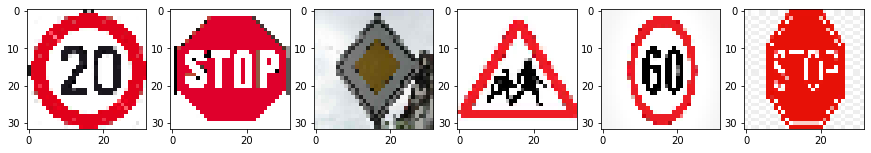

In [44]:
# VALIDATION images 
links = [
    'http://previews.123rf.com/images/mygrafics/mygrafics1109/mygrafics110900301/10647917-traffic-signs-Stock-Vector-speed-sign.jpg',
    'https://simonehr.files.wordpress.com/2013/11/stopsign.jpg',
    'http://bicyclegermany.com/Images/Laws/Arterial.jpg',
    'http://i.dailymail.co.uk/i/pix/2016/05/08/09/33F2DCE500000578-3579315-image-a-19_1462696012816.jpg',
    'https://www.driving.co.uk/s3/st-driving-prod/uploads/2015/01/compulsory-speed-limits.jpg',
    'https://img2.freepng.ru/20180320/qvq/kisspng-stop-sign-traffic-sign-clip-art-icon-download-free-stop-sign-vectors-5ab15478ebca97.6781936515215709369658.jpg'
]
test_photo = [download_image(link) for link in links]
test_photo_reshape = [im.reshape([1] + list(im.shape)) for im in test_photo]

# resize images
with tf.Session() as se:
    output = [se.run(tf.image.resize_nearest_neighbor(images = img, size = (32, 32))) for img in test_photo_reshape]
    
    
#Look at downloading pictures

f, ax = plt.subplots(1, 6, figsize=(15,3))
for i in range(6):
    ax[i].imshow(output[i][0])

32

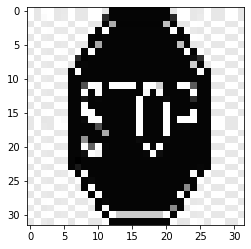

In [46]:
#Apply preprocessin on 6 validation images


te_pho = np.array([preProc_t3(preProc_t1(output[i][0])).reshape((32,32,1)) for i in range(6)])
test_labels = [42, 29, 24, 18, 47, 29]
example = te_pho[5].squeeze()
plt.imshow(example, cmap='gray')
example.shape[0]

In [47]:
#Predict the Sign Type for Each Image


def Prediction(X_data):
    se = tf.get_default_session()
    pred = se.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1.0})
    return pred

with tf.Session() as se:
    saver.restore(se, tf.train.latest_checkpoint('.'))
    pred = Prediction(te_pho)

INFO:tensorflow:Restoring parameters from .\lenet


In [48]:
#Analyze Performance

# The accuracy for these 5 new images. 
print("Prediction accuracy on 6 images is {}%".format(np.average(pred == test_labels)*100))

Prediction accuracy on 6 images is 83.33333333333334%
